# TEST RUNGE KUTTA

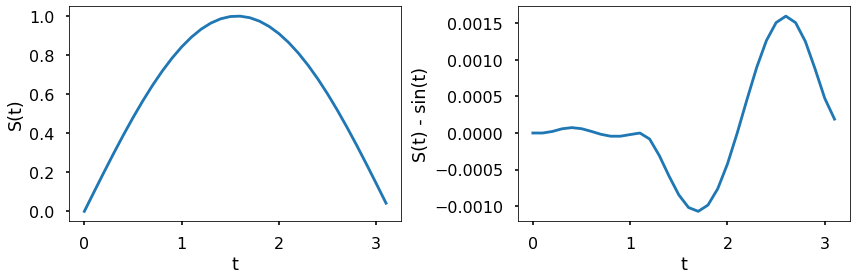

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import solve_ivp

plt.style.use('seaborn-poster')

%matplotlib inline

F = lambda t, s: np.cos(t)

t_eval = np.arange(0, np.pi, 0.1)
sol = solve_ivp(F, [0, np.pi], [0], t_eval=t_eval)

plt.figure(figsize = (12, 4))
plt.subplot(121)
plt.plot(sol.t, sol.y[0])
plt.xlabel('t')
plt.ylabel('S(t)')
plt.subplot(122)
plt.plot(sol.t, sol.y[0] - np.sin(sol.t))
plt.xlabel('t')
plt.ylabel('S(t) - sin(t)')
plt.tight_layout()
plt.show()

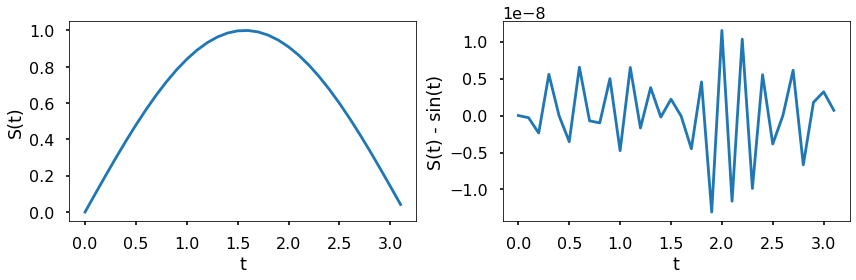

In [4]:
sol = solve_ivp(F, [0, np.pi], [0], t_eval=t_eval, \
                rtol = 1e-9, atol = 1e-9)
plt.figure(figsize = (12, 4))
plt.subplot(121)
plt.plot(sol.t, sol.y[0])
plt.xlabel('t')
plt.ylabel('S(t)')
plt.subplot(122)
plt.plot(sol.t, sol.y[0] - np.sin(sol.t))
plt.xlabel('t')
plt.ylabel('S(t) - sin(t)')
plt.tight_layout()
plt.show()

## Ballistic trajectory

see https://github.com/xoolive/python/blob/master/02-ecosysteme/08-scipy/fig03.py

see https://books.google.fr/books?id=8zsoEAAAQBAJ&pg=PA103&lpg=PA103&dq=solve_ivp+events&source=bl&ots=uQEy7Ny2NE&sig=ACfU3U14gnAUijzHuqHrtCoiyPEOv2cGjA&hl=fr&sa=X&ved=2ahUKEwiMi9OQ0fb8AhVP_rsIHXZ9AGYQ6AF6BAgxEAM#v=onepage&q=solve_ivp%20events&f=false

findfont: Font family ['Ubuntu'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Ubuntu'] not found. Falling back to DejaVu Sans.


[array([21.34958069])]
[array([[ 2.13495807e+03,  2.84217094e-14,  1.00000000e+02,
        -1.09367865e+02]])]


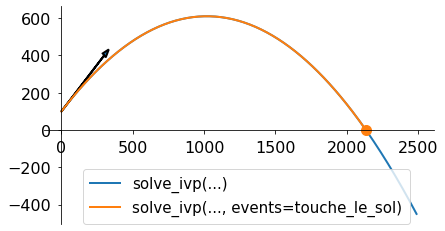

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.constants import g
from scipy.integrate import solve_ivp


def forces(t, state, g):
    g_vec = np.array([0, -g])  # metres per second
    dstate = state.copy()
    dstate[:2] = state[2:]  # vitesse
    dstate[2:] = g_vec  # accélération
    return dstate


state0 = np.array([0.0, 100.0, 100.0, 100.0])
t = np.arange(0.0, 25.0, 0.1)

sol = solve_ivp(forces, (t.min(), t.max()), state0, t_eval=t, args=(g,))

fig, ax = plt.subplots(
    figsize=(7, 4),
)
ax.plot(sol.y[0, :], sol.y[1, :], lw=2, label="solve_ivp(...)")

scale = 3
ax.arrow(
    *state0[:2],
    *scale * state0[2:],
    lw=2,
    head_width=scale * 10,
    head_length=scale * 15,
    zorder=2
)


def touche_le_sol(t, y, *args):
    return y[1]


touche_le_sol.terminal = True

sol = solve_ivp(
    forces,
    (t.min(), t.max()),
    state0,
    t_eval=t,
    args=(g,),
    events=touche_le_sol,
)

print(sol.t_events)
print(sol.y_events)

ax.plot(
    sol.y[0, :], sol.y[1, :], lw=2, label="solve_ivp(..., events=touche_le_sol)"
)
# ax[1].set_title("events=hit_ground", fontname="Ubuntu", fontsize=16, pad=7)

ax.plot(sol.y_events[0][0, 0], sol.y_events[0][0, 1], "C1o", ms=10)

ax.legend(
    loc=(0.1, 0),
    prop={
        "family": "Ubuntu",
        "size": 15,
    },
    borderpad=0.5,
)
for ax_ in [ax]:
    ax_.spines["left"].set_position("zero")
    ax_.spines["bottom"].set_position("zero")
    ax_.spines["right"].set_visible(False)
    ax_.spines["top"].set_visible(False)

    ax_.tick_params(pad=7)

    for tick in ax_.xaxis.get_major_ticks() + ax_.yaxis.get_major_ticks():
        tick.label.set_fontsize(16)
        tick.label.set_fontname("Ubuntu")

fig.savefig("fig03.png", bbox_inches="tight")

plt.show()

findfont: Font family ['Ubuntu'] not found. Falling back to DejaVu Sans.


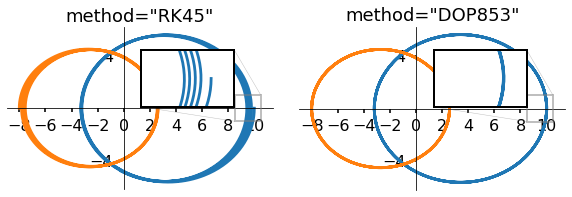

In [9]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.constants import G
from scipy.integrate import solve_ivp


def forces(t, state, m1, m2):  # replace y by z
    x1, y1, vx1, vy1, x2, y2, vx2, vy2 = state
    ss1 = np.array([x2 - x1, y2 - y1])
    r3 = (ss1 * ss1).sum()
    r3 *= np.sqrt(r3)
    return np.r_[vx1, vy1, G * m2 / r3 * ss1, vx2, vy2, -G * m1 / r3 * ss1]


s1, m1 = np.array([10.0, 0.0, 0.0, -1.0]), 8e11
s2, m2 = np.array([-8, 0, 0, 0.8]), 1e12

state0 = np.r_[s1, s2]
t = np.arange(0.0, 100.0, 0.1)

fig, ax = plt.subplots(1, 2, figsize=(10, 4))

fig.subplots_adjust(
    wspace=0.1,
)
sol = solve_ivp(
    forces, (t.min(), t.max()), state0, t_eval=t, method="RK45", args=(m1, m2)
)


ax[0].plot(sol.y[0, :], sol.y[1, :], sol.y[4, :], sol.y[5, :])
ax[0].set_title('method="RK45"', fontname="Ubuntu", fontsize=18)

ax_in = ax[0].inset_axes([0.505, 0.51, 0.35, 0.35])
ax_in.set_xlim((8.5, 10.5))
ax_in.set_ylim((-1, 1))
ax_in.xaxis.set_major_locator(plt.NullLocator())
ax_in.yaxis.set_major_locator(plt.NullLocator())
for s in ax_in.spines.values():
    s.set_linewidth(2)

ax[0].indicate_inset_zoom(ax_in, lw=2)
ax_in.plot(sol.y[0, :], sol.y[1, :], sol.y[4, :], sol.y[5, :])


sol = solve_ivp(
    forces, (t.min(), t.max()), state0, t_eval=t, method="DOP853", args=(m1, m2)
)

ax[1].plot(
    sol.y[0, :],
    sol.y[1, :],
    sol.y[4, :],
    sol.y[5, :],
)
ax[1].set_title('method="DOP853"', fontname="Ubuntu", fontsize=18)

ax_in = ax[1].inset_axes([0.505, 0.51, 0.35, 0.35])
ax_in.set_xlim((8.5, 10.5))
ax_in.set_ylim((-1, 1))
ax_in.xaxis.set_major_locator(plt.NullLocator())
ax_in.yaxis.set_major_locator(plt.NullLocator())
for s in ax_in.spines.values():
    s.set_linewidth(2)

ax[1].indicate_inset_zoom(ax_in, lw=2)
ax_in.plot(sol.y[0, :], sol.y[1, :], sol.y[4, :], sol.y[5, :])
# plt.set_aspect(1)

for ax_ in ax.ravel():

    ax_.spines["left"].set_position("zero")
    ax_.spines["bottom"].set_position("zero")
    ax_.spines["right"].set_visible(False)
    ax_.spines["top"].set_visible(False)

    ax_.tick_params(pad=7)
    for tick in ax_.xaxis.get_major_ticks() + ax_.yaxis.get_major_ticks():
        tick.label.set_fontsize(16)
        tick.label.set_fontname("Ubuntu")

    ax_.xaxis.set_major_locator(plt.MultipleLocator(2))
    ax_.yaxis.set_major_locator(plt.FixedLocator([-4, 4]))

    ax_.set_aspect(1)

fig.savefig("fig04.png", bbox_inches="tight")

plt.show()